<a href="https://colab.research.google.com/github/moridin04/CCALCOMP_EXERCISES_COM222/blob/main/Exercise8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 8: Create your own personal face recognition using SVM

In [49]:
pip install numpy opencv-python scikit-learn

## Import libraries

In [50]:
import os
import cv2
import numpy as np
from PIL import Image  # PIL is used to load the image
import matplotlib.pyplot as plt

## Mount Google Drive

In [51]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Display a single image from your drive

(0.0, 1.0, 0.0, 1.0)

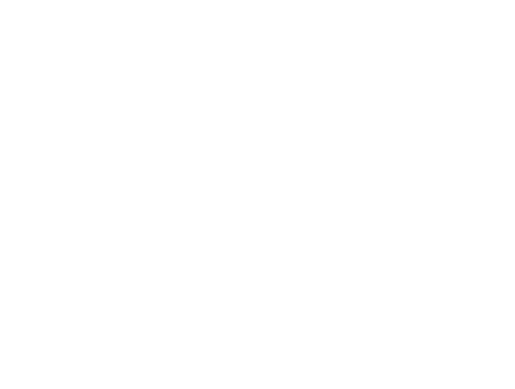

In [52]:
image_path = '/content/drive/My Drive/Images/Neo/g5.jpeg'
image = Image.open(image_path)
plt.axis('off')

In [65]:
def load_images_from_folder(folder):
    images = []
    labels = [0, 1]
    for label, person in enumerate(os.listdir(folder)):
        person_folder = os.path.join(folder, person)
        for filename in os.listdir(person_folder):
            img_path = os.path.join(person_folder, filename)
            img = cv2.imread(img_path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            img = cv2.resize(img, (100, 100))
            images.append(img.flatten())
            labels.append(label)
    return np.array(images), np.array(labels)

images, labels = load_images_from_folder('/content/drive/My Drive/Images/')

In [66]:
images.shape

(29, 10000)

In [67]:
labels.shape

(29,)

In [68]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

## Split your data

In [69]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size = 0.1, random_state = 42)

## Train your SVM model

In [70]:
from sklearn import svm

model = svm.SVC(gamma='auto')
model.fit(x_train, y_train)

ValueError: The number of classes has to be greater than one; got 1 class

## Evaluate your model

In [ ]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

## Test your model using images not in your training set

In [ ]:
def predict_image(img_path, model):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.resize(img, (100, 100)).flatten().reshape(1, -1)
    prediction = model.predict(img)
    return prediction

result = predict_image('/content/drive/My Drive/Test/', model)
print(f'Predicted label:', result)